In [1]:
import pylizard

In [3]:
x, y, dist = 221345, 451589, 5000
df_peilbuizen = pylizard.pnt2buis(x, y, dist, report=True)

GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&point=6.354386713282765,52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=2&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=3&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=4&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=5&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=6&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=7&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=5000&page=8&point=6.354386713282765%2C52.04863709224236
GET https://vitens.lizard.net/api/v3/groundwaterstations/

In [4]:
df_meting = df_peilbuizen.loc[(df_peilbuizen['uuid_hand']!='') | (df_peilbuizen['uuid_diver']!='')]

In [25]:
m = {}
for p in df_meting.iterrows():
    print(p[0])
    m[p[0]] = pylizard.Peilbuis(p[1]['buis'], p[1]['filt'], report=True)

B34C1033001
GET https://vitens.lizard.net/api/v3/locations/?code__icontains=B34C1033001
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=100&point=6.338410803499527,52.096056637804566
B34C0233001
GET https://vitens.lizard.net/api/v3/locations/?code__icontains=B34C0233001
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=100&point=6.359257365530948,52.04802211254835
34C-0323001
GET https://vitens.lizard.net/api/v3/locations/?code__icontains=34C-0323001
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=100&point=6.379967891350674,52.0773410326229
33H-0407001
GET https://vitens.lizard.net/api/v3/locations/?code__icontains=33H-0407001
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=100&point=6.324896067474575,52.06675136050438
34C-0025001
GET https://vitens.lizard.net/api/v3/locations/?code__icontains=34C-0025001
GET https://vitens.lizard.net/api/v3/groundwaterstations/?dist=100&point=6.354317298264464,52.075043855118444
33H-0017001
GE

NameError: name 'plt' is not defined

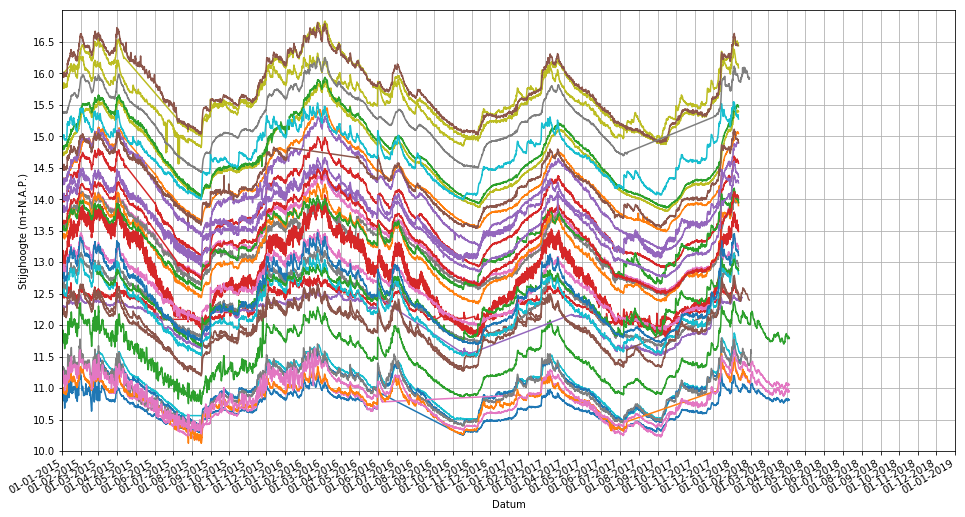

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy

fig, ax = plt.subplots(figsize=[16, 9])

h = {}
for k, v in m.items():
    #print(k, v)
    if v.uuid_diver!='':
        h = v.head_diver 
        h.loc[h<17].plot(label=k, ax=ax)

ax.set_xlabel('Datum')
ax.set_ylabel('Stijghoogte (m+N.A.P.)')

ax.set_xlim('2015', '2019')
ax.set_ylim(10, 17)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))\

ax.set_yticks(numpy.arange(10, 17, 0.5))

ax.grid()